In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.utils import to_categorical


In [2]:
# Load dataset
dataset = pd.read_csv("heart.csv")
X = dataset.iloc[:, :-1]
y = dataset.iloc[:,1]

In [6]:
X.shape

(1025, 13)

In [3]:
# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [22]:
Y_train.shape

(717,)

In [4]:
# Convert target variable into numpy array
Y_train = np.array(Y_train).reshape(-1, )
Y_test = np.array(Y_test).reshape(-1, )

In [7]:
X_train.shape

(717, 13)

In [8]:
Y_train.shape

(717,)

In [9]:
# Define model
model = Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(24, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')  # Changed from softmax to sigmoid
])

C:\Users\Pravin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Compile model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           3,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 24)                  │             600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 24)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 24)                  │              96 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              25 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,217 (24.29 KB)

 Trainable params: 5,865 (22.91 KB)

 Non-trainable params: 352 (1.38 KB)

In [18]:
# Train model
history = model.fit(X_train, Y_train, batch_size=100, epochs=30, validation_data=(X_test, Y_test))

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - accuracy: 0.6990 - loss: 0.6290 - val_accuracy: 0.7045 - val_loss: 0.6139
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6820 - loss: 0.6471 - val_accuracy: 0.7045 - val_loss: 0.6159
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6668 - loss: 0.6459 - val_accuracy: 0.6981 - val_loss: 0.6159
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6712 - loss: 0.6430 - val_accuracy: 0.6981 - val_loss: 0.6154
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6516 - loss: 0.6664 - val_accuracy: 0.6981 - val_loss: 0.6160
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6737 - loss: 0.6565 - val_accuracy: 0.6916 - val_loss: 0.6172
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7164 - loss: 0.6104 - val_accuracy: 0.6851 - val_loss: 0.6193
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6682 - loss: 0.6372 - val_accuracy: 0.6851 - val_loss: 0.6200


In [12]:
# Evaluate model
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('Heart Disease Model Test Accuracy:', round(test_acc, 4))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6597 - loss: 0.6381 
Heart Disease Model Test Accuracy: 0.6916


In [13]:
# Make predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step


In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.03      0.06        98
           1       0.69      1.00      0.82       210

    accuracy                           0.69       308
   macro avg       0.84      0.52      0.44       308
weighted avg       0.79      0.69      0.57       308



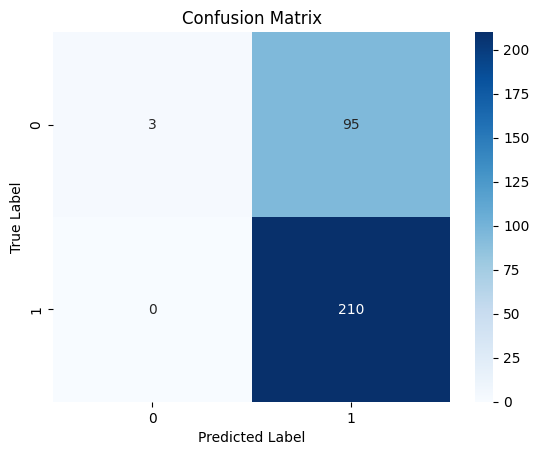

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [21]:
conf_matrix 

array([[  3,  95],
       [  0, 210]], dtype=int64)

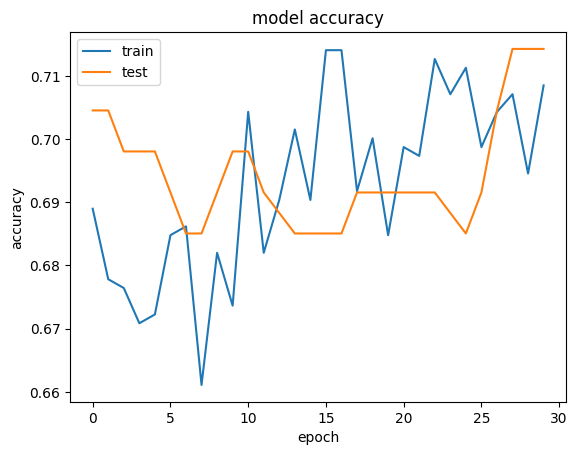

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()


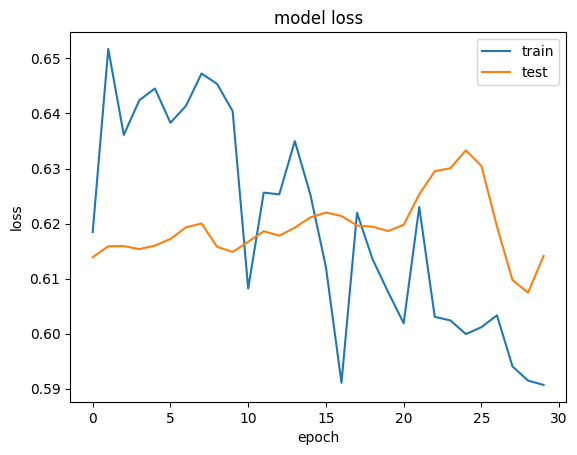

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()